In [2]:
import os
import requests
from PIL import Image

from tqdm import tqdm

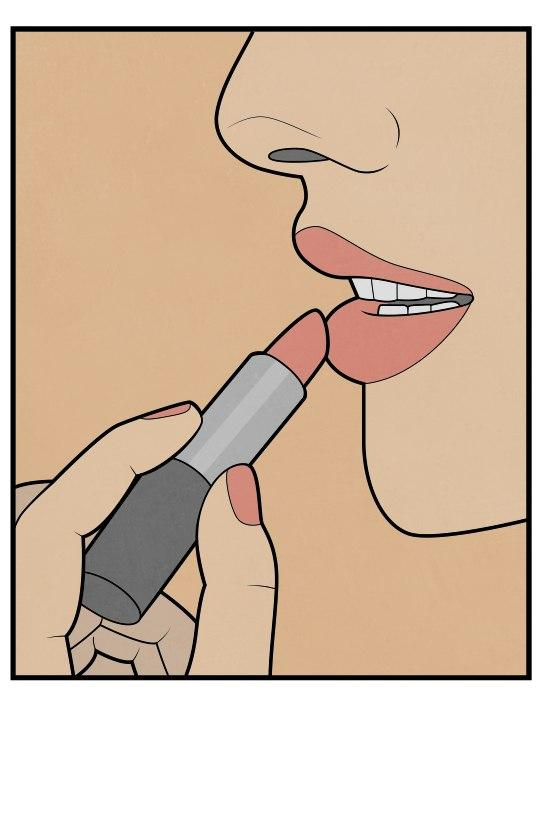

In [10]:
def is_row_white(image, y):
    for x in range(image.width):
        if image.getpixel((x, y)) != (255, 255, 255):  # Not white
            return False
    return True

def crop_top(image):
    for y in range(image.height):
        if not is_row_white(image, y):
            break
    if y == image.height-1:
        raise Exception("y reached end")
    for yy in range(y+1, image.height):
        if is_row_white(image,yy):
            break
    if yy == image.height-1:
        raise Exception(f"yy reached end, y was {y}, height was {image.height}")

    crop_area = (0, yy, image.width, image.height)
    cropped_image = image.crop(crop_area)
    return cropped_image

display(crop_top(Image.open("images_split/20240101_173712_YES.jpg")))

In [12]:
left_fails = []
right_fails = []

for filename in tqdm(os.listdir("images")):
    img = Image.open(os.path.join("images",filename))
    middle = img.width // 2

    left_half = img.crop((0, 0, middle, img.height))
    right_half = img.crop((middle, 0, img.width, img.height))

    name = filename[:-4]

    try:
        left_cropped = crop_top(left_half)
        left_cropped.save(f"images_split/{name}_YES.jpg")
    except:
        print(f"Couldn't do left for file: {name}")
        left_fails.append(name)

    try:
        right_cropped = crop_top(right_half)
        right_cropped.save(f"images_split/{name}_BUT.jpg")
    except:
        print(f"Couldn't do right for file: {name}")
        right_fails.append(name)

  9%|█████████████▌                                                                                                                                           | 25/283 [00:03<00:30,  8.59it/s]

Couldn't do left for file: Screenshot_2024-01-01-17-59-17-340_com.twitter.android-edit
Couldn't do right for file: Screenshot_2024-01-01-17-59-17-340_com.twitter.android-edit


 17%|█████████████████████████▍                                                                                                                               | 47/283 [00:06<00:34,  6.86it/s]

Couldn't do left for file: 20240101_173007


 30%|█████████████████████████████████████████████▉                                                                                                           | 85/283 [00:12<00:22,  8.63it/s]

Couldn't do left for file: 20240101_172315
Couldn't do right for file: 20240101_172315


 40%|█████████████████████████████████████████████████████████████▏                                                                                          | 114/283 [00:16<00:19,  8.54it/s]

Couldn't do left for file: 20240101_172317
Couldn't do right for file: 20240101_172317


 48%|████████████████████████████████████████████████████████████████████████▌                                                                               | 135/283 [00:19<00:17,  8.53it/s]

Couldn't do left for file: 20240101_175048
Couldn't do right for file: 20240101_175048


 48%|█████████████████████████████████████████████████████████████████████████▌                                                                              | 137/283 [00:19<00:17,  8.36it/s]

Couldn't do left for file: Screenshot_2024-01-01-17-55-08-129_com.twitter.android~2
Couldn't do right for file: Screenshot_2024-01-01-17-55-08-129_com.twitter.android~2


 53%|█████████████████████████████████████████████████████████████████████████████████                                                                       | 151/283 [00:21<00:15,  8.76it/s]

Couldn't do left for file: Screenshot_2024-01-01-18-15-32-614_com.twitter.android-edit
Couldn't do right for file: Screenshot_2024-01-01-18-15-32-614_com.twitter.android-edit


 58%|████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 165/283 [00:23<00:16,  7.25it/s]

Couldn't do left for file: Screenshot_2024-01-01-18-12-18-789_com.twitter.android-edit
Couldn't do right for file: Screenshot_2024-01-01-18-12-18-789_com.twitter.android-edit


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 199/283 [00:28<00:09,  8.58it/s]

Couldn't do left for file: Screenshot_2024-01-01-17-38-54-117_com.twitter.android-edit
Couldn't do right for file: Screenshot_2024-01-01-17-38-54-117_com.twitter.android-edit


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 223/283 [00:31<00:07,  8.26it/s]

Couldn't do left for file: 20240101_174147
Couldn't do right for file: 20240101_174147


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 283/283 [00:40<00:00,  7.02it/s]


In [14]:
!mkdir split_fails
for name in left_fails:
    ! cp images/{name}.jpg split_fails/{name}_YES.jpg
for name in right_fails:
    ! cp images/{name}.jpg split_fails/{name}_BUT.jpg

mkdir: cannot create directory ‘split_fails’: File exists


In [16]:
!zip -r split_fails.zip split_fails

  adding: split_fails/ (stored 0%)
  adding: split_fails/Screenshot_2024-01-01-17-55-08-129_com.twitter.android~2_BUT.jpg (deflated 10%)
  adding: split_fails/20240101_172315_BUT.jpg (deflated 0%)
  adding: split_fails/Screenshot_2024-01-01-17-59-17-340_com.twitter.android-edit_BUT.jpg (deflated 1%)
  adding: split_fails/20240101_175048_YES.jpg (deflated 6%)
  adding: split_fails/20240101_172315_YES.jpg (deflated 0%)
  adding: split_fails/20240101_174147_YES.jpg (deflated 6%)
  adding: split_fails/Screenshot_2024-01-01-18-15-32-614_com.twitter.android-edit_YES.jpg (deflated 7%)
  adding: split_fails/Screenshot_2024-01-01-18-15-32-614_com.twitter.android-edit_BUT.jpg (deflated 7%)
  adding: split_fails/20240101_172317_BUT.jpg (deflated 0%)
  adding: split_fails/Screenshot_2024-01-01-18-12-18-789_com.twitter.android-edit_BUT.jpg (deflated 12%)
  adding: split_fails/Screenshot_2024-01-01-17-38-54-117_com.twitter.android-edit_BUT.jpg (deflated 5%)
  adding: split_fails/Screenshot_2024-01-0